## Assignment 2 - Data Mining

## Question No. 1: (Data Analysis)

In my case, I have used Google Colab to implement the code. Thus, I have saved the files in a Google Drive folder. However, as long as the script is run in the same folder as where the data is stored, the data upload can beas simple as removing the '#' from the second input box

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

#X = np.load("images.npy") #read images
#Y = pd.read_csv("counts.csv") #read cell counts
#F = np.loadtxt("split.txt") #read fold information

# As I am using Google Colab, I am uploading the files from Google Drive

X = np.load("/content/drive/MyDrive/data/images.npy") #read images
Y = pd.read_csv("/content/drive/MyDrive/data/counts.csv") #read cell counts
F = np.loadtxt("/content/drive/MyDrive/data/split.txt") #read fold information


In [4]:
X.shape

(4981, 256, 256, 3)

In [5]:
Y.shape

(4981, 6)

In [6]:
F.shape

(4981,)

### Question No. 1: (Data Analysis)

#### Load the training and test data files and answer the questions

#### i. How many examples are there in each fold?

In [7]:
for j in range(1,4):
    print("There are", len(F[F==j]), "examples in fold",j)

There are 1622 examples in fold 1
There are 1751 examples in fold 2
There are 1608 examples in fold 3


In [8]:
#Define the folds
F1 = F[F==1]
F2 = F[F==2]
F3 = F[F==3]

In [9]:
X_F1 = X[F==1]
X_F2 = X[F==2]
X_F3 = X[F==3]

Y_F1 = Y[F==1]
Y_F2 = Y[F==2]
Y_F3 = Y[F==3]

#### ii. Show some image examples using 'plt.imshow'. Describe your observations on what you see in the images and how it  correlates with the cell counts of different types of cells, especially T3 cells.

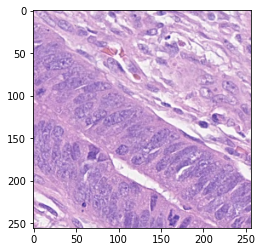

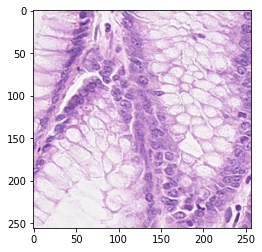

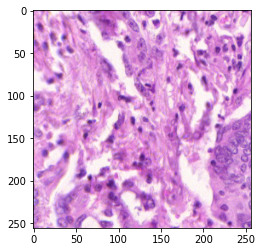

In [10]:
import matplotlib.pyplot as plt
np.random.seed(42)
random = np.random.randint(0,high = len(X),size = 5)
for i in random:
    fig = plt.figure()
    imgplot = plt.imshow(X[i])

We can see different types of structures among each of the images. These correspond to different kinds of cells. They are have been counted for each of the images and stored in the dataset 'counts.csv'.

In [11]:
datafrm = pd.DataFrame(Y, index = random)

In [12]:
datafrm

neutrophil  epithelial  lymphocyte  plasma  eosinophil  connective
860            0          58           3       1           0          35
3772           0          49           9       2           0          28
3092           2          81          11       2           0          27
466            0          83           3       2           0           2
4426           1          28          15       6           2          19

#### iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How many images have counts within each of the following bins?  

In [13]:
Y1 = np.array(Y_F1)
Y2 = np.array(Y_F2)
Y3 = np.array(Y_F3)

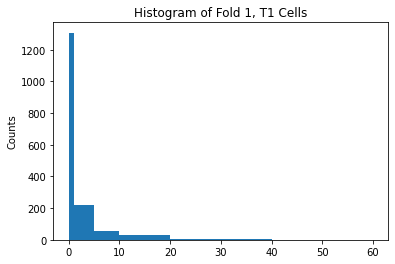

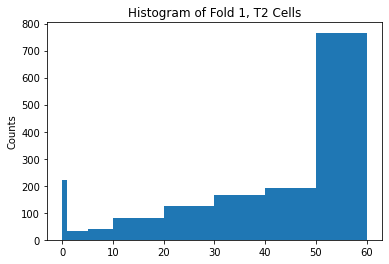

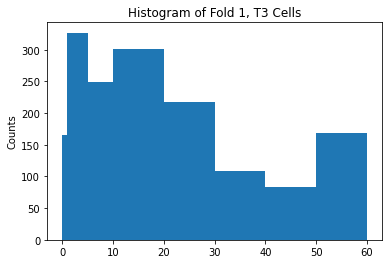

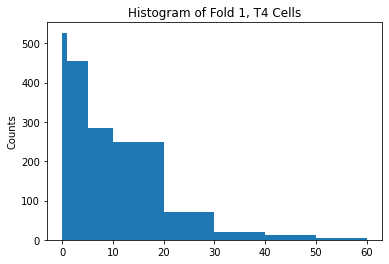

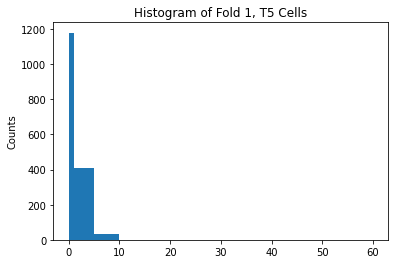

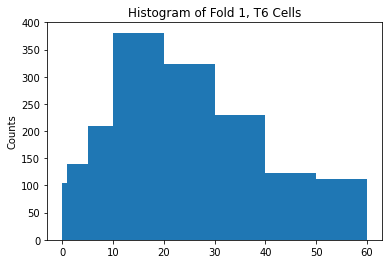

In [14]:
for cell in range(6):
  tcell = Y1[:,cell]
  bins = [0,1,5,10,20,30,40,50, 60]
  plt.hist(np.clip(tcell, 0, bins[-1]), bins = bins) # I store the counts >50 in the range 50-60
  plt.title(f'Histogram of Fold 1, T{cell+1} Cells')
  plt.ylabel('Counts')
  plt.show()

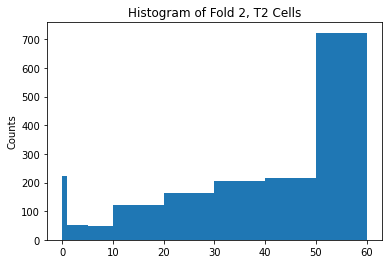

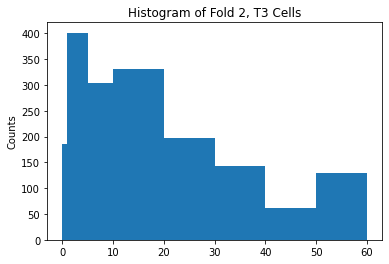

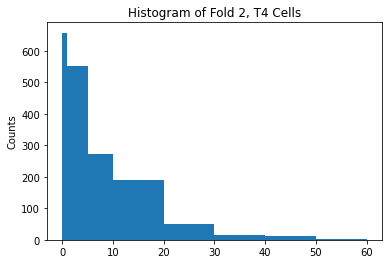

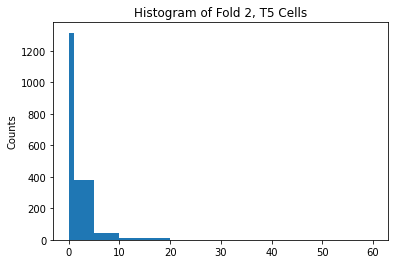

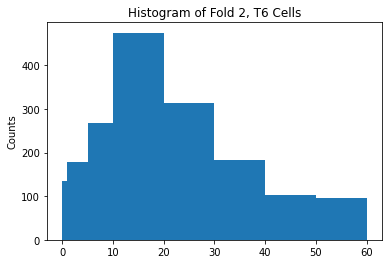

In [15]:
for cell in range(6):
  tcell = Y2[:,cell]
  bins = [0,1,5,10,20,30,40,50, 60]
  plt.hist(np.clip(tcell, 0, bins[-1]), bins = bins) # I store the counts >50 in the range 50-60
  plt.title(f'Histogram of Fold 2, T{cell+1} Cells')
  plt.ylabel('Counts')
  plt.show()

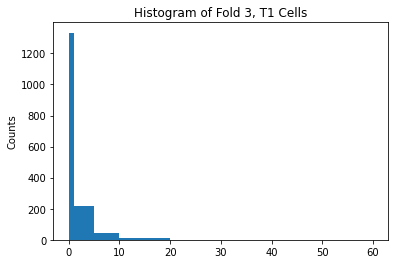

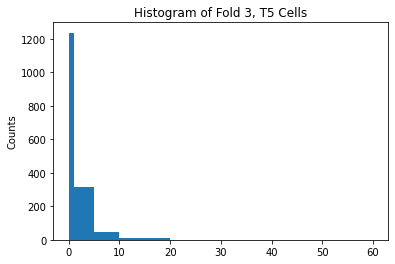

In [16]:
for cell in range(6):
  tcell = Y3[:,cell]
  bins = [0,1,5,10,20,30,40,50, 60]
  plt.hist(np.clip(tcell, 0, bins[-1]), bins = bins) # I store the counts >50 in the range 50-60
  plt.title(f'Histogram of Fold 3, T{cell+1} Cells')
  plt.ylabel('Counts')
  plt.show()

#### iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei. For this purpose, you can use the color separation notebook availabe here: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html 

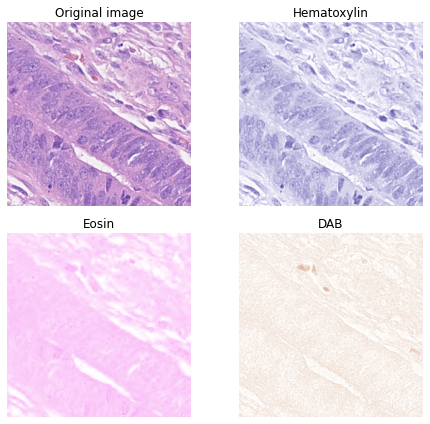

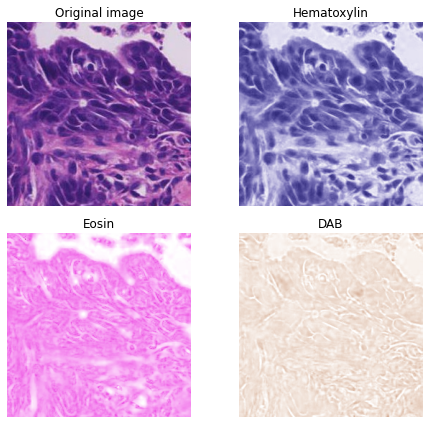

In [17]:
from skimage.color import rgb2hed, hed2rgb

#Separate the stains from the images
np.random.seed(42)
rndm_list = np.random.randint(0,len(X),size = 4)
for k in rndm_list:
  im_hed = rgb2hed(X[k])  #We pick a random image

  #Create an RGB image for each of the stains
  null = np.zeros_like(im_hed[:,:,0])
  im_h = hed2rgb(np.stack((im_hed[:, :,0], null, null), axis=-1))
  im_e = hed2rgb(np.stack((null, im_hed[:, :,1], null), axis=-1))
  im_d = hed2rgb(np.stack((null, null, im_hed[:, :,2]), axis=-1))

  fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(X[k])
  ax[0].set_title("Original image")

  ax[1].imshow(im_h)
  ax[1].set_title("Hematoxylin")

  ax[2].imshow(im_e)
  ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

  ax[3].imshow(im_d)
  ax[3].set_title("DAB")

  for a in ax.ravel():
      a.axis('off')

  #print('H channel :', im_hed[:,:,0])
  fig.tight_layout()

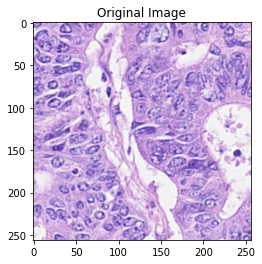

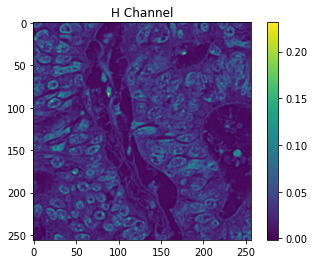

In [18]:
from skimage.color import rgb2hed
import matplotlib.pyplot as plt

I = X[0]/255.0 #read sample image and rescale pixel range in it
I_hed = rgb2hed(I) #convert to HED
plt.imshow(I);plt.title('Original Image');plt.show()

I_h = I_hed[:,:,0]; plt.figure(); plt.imshow(I_h);plt.colorbar();plt.title('H Channel');plt.show()


#### v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning



Text(0.5, 0.98, 'Connective scatter plot')

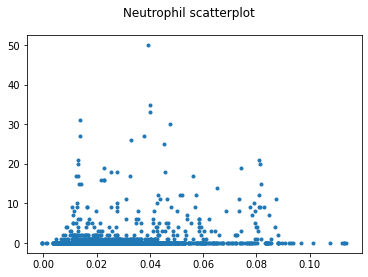

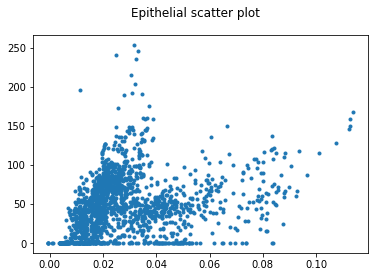

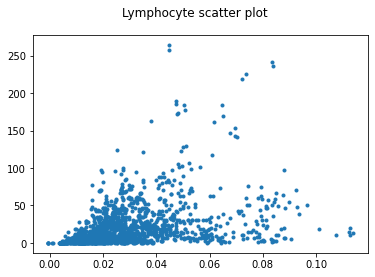

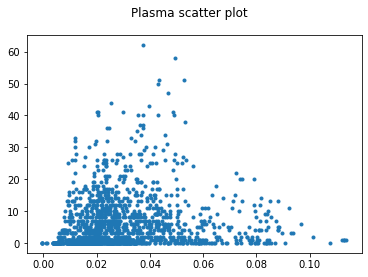

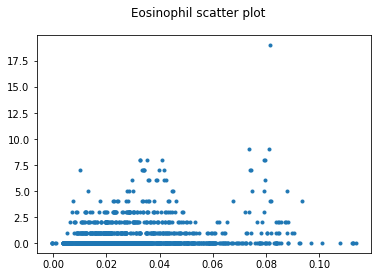

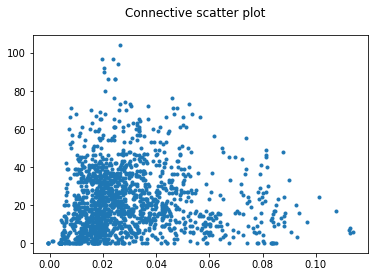

In [19]:
mean_h_channel = np.zeros(len(F1))
for i in range(len(X_F1)):

  im_hed = rgb2hed(X_F1[i]/255.0)
  
  mean_h_channel[i] = np.mean(im_hed[:,:,0])

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['neutrophil'], marker = '.')
fig.suptitle('Neutrophil scatterplot')

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['epithelial'],  marker = '.')
fig.suptitle("Epithelial scatter plot")

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte scatter plot") 

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['plasma'], marker = '.')
fig.suptitle("Plasma scatter plot")

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['eosinophil'], marker = '.')
fig.suptitle("Eosinophil scatter plot")

fig = plt.figure()
plt.scatter(mean_h_channel, Y_F1['connective'], marker = '.')
fig.suptitle("Connective scatter plot")



The average of the H-channel for each image can be useful in the regression model, mainly regarding Epithelial, Lymphocyte and Connective cells. 

#### vi. What performance metrics can you use for this problem? Which one will be the best performance metric for this problem? Please give reasoning. 

This is a regression problem. Therefore, we want to measure how far our predictions are from the actual values. In these situations, we are going to be interested in using the Root Mean Squared Error, Mean Absolute Error, R^2 score and correlation coefficients.

## Question No. 2: (Feature Extraction and Classical Regression)

### For the following questions, use only T3 type of cells as the output prediction variable.

#### i. Extract features from a given image. Specifically, calculate the:
a. average of the “H”, red, green and blue channels \
  b. variance of the “H”, red, green and blue channels \
  c. entropy of the “H”, red, green and blue channels \
  d. Any other features that you think can be useful  for this work. Describe your reasoning for using these features. \\
   HINT/Suggestion: You may want to use PCA Coefficients of image data (you may want to use randomized PCA or incremental PCA, see: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). In case of computational complexity, you can reduce the number of images being used in determining the PCA basis. You can also look at other features such as GLCM features (https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html) or transfer learning features. You can resize the images if needed.

**Averages**

In [20]:
np.random.seed(42)

rndm = np.random.randint(0,high = len(X))

im_hed = rgb2hed(X_F1[rndm])

mean_h_channel= np.mean(im_hed[:,:,0])
mean_red= np.mean(X_F1[rndm,:,:,0]/255.0)
mean_green = np.mean(X_F1[rndm,:,:,1]/255.0)
mean_blue = np.mean(X_F1[rndm,:,:,2]/255.0)


print('The average of the \'H\' channel is', mean_h_channel)
print('The average of the red channel is', mean_red)
print('The average of the green channel is', mean_green)
print('The average of the blue channel is', mean_blue)


The average of the 'H' channel is 0.047395463227505194
The average of the red channel is 0.6565567315793505
The average of the green channel is 0.49996002795649513
The average of the blue channel is 0.7273661295572916


**Variances**

In [21]:
np.random.seed(42)

var_h_channel= np.var(im_hed[:,:,0])
var_red= np.var(X_F1[rndm,:,:,0]/255.0)
var_green = np.var(X_F1[rndm,:,:,1]/255.0)
var_blue = np.var(X_F1[rndm,:,:,2]/255.0)

print('The variance of the \'H\' channel is', var_h_channel)
print('The variance of the red channel is', var_red)
print('The variance of the green channel is', var_green)
print('The variance of the blue channel is', var_blue)

The variance of the 'H' channel is 0.0016723417397996364
The variance of the red channel is 0.04696024903867885
The variance of the green channel is 0.04949279695777927
The variance of the blue channel is 0.02126625335441959


**Entropies**

In [22]:
from skimage.measure.entropy import shannon_entropy

np.random.seed(42)
rndm = np.random.randint(0,high = len(X))

im_hed = rgb2hed(X_F1[rndm])

ent_h_channel= shannon_entropy(im_hed[:,:,0])
ent_red= shannon_entropy(X_F1[rndm,:,:,0]/255.0)
ent_green = shannon_entropy(X_F1[rndm,:,:,1]/255.0)
ent_blue = shannon_entropy(X_F1[rndm,:,:,2]/255.0)


print('The entropy of the \'H\' channel is', ent_h_channel)
print('The entropy of the red channel is', ent_red)
print('The entropy of the green channel is', ent_green)
print('The entropy of the blue channel is', ent_blue)

The entropy of the 'H' channel is 15.227047994034288
The entropy of the red channel is 7.541752290499191
The entropy of the green channel is 7.576602332848833
The entropy of the blue channel is 7.112515765750732


**Other features: PCA**

In [23]:
from sklearn.decomposition import PCA

np.random.seed(42)
rndm = np.random.randint(0,high = len(X))

im_hed = rgb2hed(X_F1[rndm])

pca = PCA()
pca.fit(im_hed[:,:,0])
for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
    if np.cumsum(pca.explained_variance_ratio_)[i] > 0.99:
        print('The number of dimensions that explain 99% of the variance is', i+1)
        break

The number of dimensions that explain 99% of the variance is 61


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(im_hed[:,:,0])
print(pca.singular_values_)


[3.30395364 2.82191807 2.59280938 2.44189451 2.31265172 2.26345168
 2.16032766]


We could use this vector of the first 7 principal components as a feature vector of the image.

#####  Plot the scatter plot and calculate the correlation coefficient of each feature in Q(2i,a-c)you obtain vs. the target variable (cell count) across all images. Which features do you think are important? Give your reasoning

**Mean**

In [25]:
mean_h_channel = np.zeros(len(F));mean_red = np.zeros(len(F));mean_green = np.zeros(len(F));mean_blue = np.zeros(len(F));
for i in range(len(X)):

  im_hed = rgb2hed(X[i]/255.0)
  
  mean_h_channel[i] = np.mean(im_hed[:,:,0]) 
  mean_red[i]= np.mean(X[i,:,:,0]/255.0)
  mean_green[i] = np.mean(X[i,:,:,1]/255.0)
  mean_blue[i] = np.mean(X[i,:,:,2]/255.0)

Text(0.5, 0.98, 'Lymphocyte - mean Blue channel scatter plot')

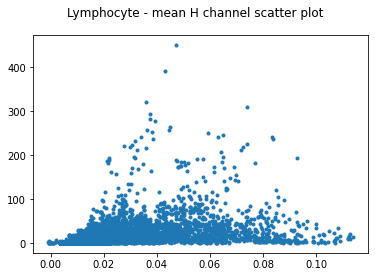

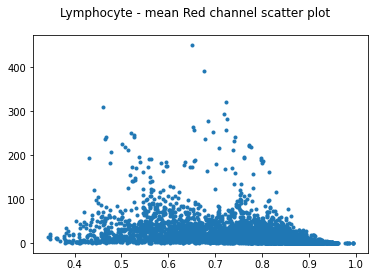

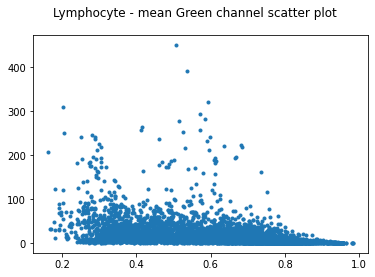

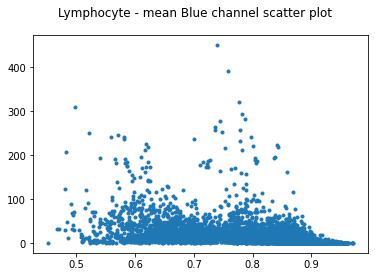

In [26]:
fig = plt.figure()
plt.scatter(mean_h_channel, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - mean H channel scatter plot")

fig = plt.figure()
plt.scatter(mean_red, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - mean Red channel scatter plot")

fig = plt.figure()
plt.scatter(mean_green, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - mean Green channel scatter plot")

fig = plt.figure()
plt.scatter(mean_blue, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - mean Blue channel scatter plot")

Note that the scatter plots have a very similar shape (although the scatter plot for the H-channel is "mirrored" in comparison to the others). Let's find now the correlation coeficients of each feature vs the cell counts.

In [27]:
import scipy.stats as st
print('Pearson correlation coefficient of mean H-channel and cell counts',st.pearsonr(mean_h_channel,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of mean Red-channel and cell counts',st.pearsonr(mean_red, Y['lymphocyte'])[0])
print('Pearson correlation coefficient of mean Green-channel and cell counts',st.pearsonr(mean_green,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of mean Blue-channel and cell counts',st.pearsonr(mean_blue,Y['lymphocyte'])[0])
print()
print('Spearman correlation coefficient of mean H-channel and cell counts',st.spearmanr(mean_h_channel, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of mean Red-channel and cell counts',st.spearmanr(mean_red, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of mean Green-channel and cell counts',st.spearmanr(mean_green, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of mean Blue-channel and cell counts',st.spearmanr(mean_blue, Y['lymphocyte'])[0])

Pearson correlation coefficient of mean H-channel and cell counts 0.3304252284863314
Pearson correlation coefficient of mean Red-channel and cell counts -0.3604682756241054
Pearson correlation coefficient of mean Green-channel and cell counts -0.38567031837731586
Pearson correlation coefficient of mean Blue-channel and cell counts -0.37574599037357703

Spearman correlation coefficient of mean H-channel and cell counts 0.5656298152741058
Spearman correlation coefficient of mean Red-channel and cell counts -0.5736761933250187
Spearman correlation coefficient of mean Green-channel and cell counts -0.5806819065014655
Spearman correlation coefficient of mean Blue-channel and cell counts -0.5793810296556449


The absolute value of the correlation coefficient for each of the features is similar. Therefore, all this features will have the same importance in the model. However, as the correlation coefficients are not too close to 1, means will not be as important as other features

**Variance**

In [28]:
var_h_channel = np.zeros(len(F));var_red = np.zeros(len(F));var_green = np.zeros(len(F));var_blue = np.zeros(len(F));
for i in range(len(X)):

  im_hed = rgb2hed(X[i]/255.0)

  var_h_channel[i]= np.var(im_hed[:,:,0])
  var_red[i]= np.var(X[i,:,:,0]/255.0)
  var_green[i] = np.var(X[i,:,:,1]/255.0)
  var_blue[i] = np.var(X[i,:,:,2]/255.0)

Text(0.5, 0.98, 'Lymphocyte - variance Blue channel scatter plot')

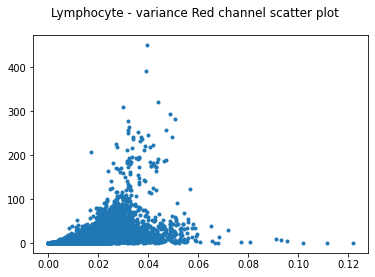

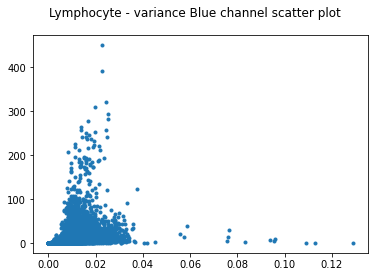

In [29]:
fig = plt.figure()
plt.scatter( var_h_channel, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance H channel scatter plot")

fig = plt.figure()
plt.scatter(  var_red, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Red channel scatter plot")

fig = plt.figure()
plt.scatter( var_green, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Green channel scatter plot")

fig = plt.figure()
plt.scatter(var_blue, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Blue channel scatter plot")

In [30]:
import scipy.stats as st
print('Pearson correlation coefficient of variance H-channel and cell counts',st.pearsonr(var_h_channel,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of variance Red-channel and cell counts',st.pearsonr(var_red,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of variance Green-channel and cell counts',st.pearsonr(var_green,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of variance Blue-channel and cell counts',st.pearsonr(var_blue,Y['lymphocyte'])[0])
print()
print('Spearman correlation coefficient of variance H-channel and cell counts',st.spearmanr(var_h_channel,Y['lymphocyte'])[0])
print('Spearman correlation coefficient of variance Red-channel and cell counts',st.spearmanr(var_red,Y['lymphocyte'])[0])
print('Spearman correlation coefficient of variance Green-channel and cell counts',st.spearmanr(var_green,Y['lymphocyte'])[0])
print('Spearman correlation coefficient of variance Blue-channel and cell counts',st.spearmanr(var_blue,Y['lymphocyte'])[0])

Pearson correlation coefficient of variance H-channel and cell counts 0.43991358744700915
Pearson correlation coefficient of variance Red-channel and cell counts 0.4016387099850657
Pearson correlation coefficient of variance Green-channel and cell counts 0.12884761376222903
Pearson correlation coefficient of variance Blue-channel and cell counts 0.24206174107785994

Spearman correlation coefficient of variance H-channel and cell counts 0.6678860263934874
Spearman correlation coefficient of variance Red-channel and cell counts 0.6460040016346007
Spearman correlation coefficient of variance Green-channel and cell counts 0.3587926355808655
Spearman correlation coefficient of variance Blue-channel and cell counts 0.5529916219387309


From this we can easily infer that the variance of the Green and Blue channels is not going to be an important feature in our model. Of course it is going to give us some information, but it is not a feature that has a big correlation with the number of counts and therefore will not be that useful. However, the variance of the H and the Red channels have a considerably high correlation with the cell counts and will probably give more significant information.

**Entropy**

I have used the function shannon_entropy from sklearn, which measures the amount of information in each of the images

In [31]:
from skimage.measure.entropy import shannon_entropy

ent_h_channel = np.zeros(len(F));ent_red = np.zeros(len(F));ent_green = np.zeros(len(F));ent_blue = np.zeros(len(F));
for i in range(len(X)):

  im_hed = rgb2hed(X[i]/255.0)

  ent_h_channel[i] = shannon_entropy(im_hed[:,:,0])
  ent_red[i] = shannon_entropy(X[i,:,:,0]/255.0)
  ent_green[i] = shannon_entropy(X[i,:,:,1]/255.0)
  ent_blue[i] = shannon_entropy(X[i,:,:,2]/255.0)


Text(0.5, 0.98, 'Lymphocyte - variance Blue channel scatter plot')

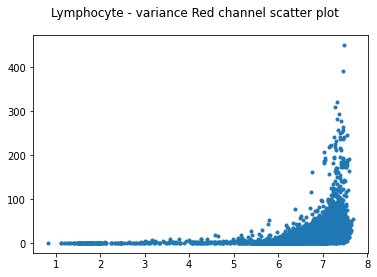

In [32]:
fig = plt.figure()
plt.scatter(ent_h_channel, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance H channel scatter plot")

fig = plt.figure()
plt.scatter(ent_red, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Red channel scatter plot")

fig = plt.figure()
plt.scatter(ent_green, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Green channel scatter plot")

fig = plt.figure()
plt.scatter(ent_blue, Y['lymphocyte'], marker = '.')
fig.suptitle("Lymphocyte - variance Blue channel scatter plot")

In [33]:
import scipy.stats as st
print('Pearson correlation coefficient of entropy H-channel and cell counts',st.pearsonr(ent_h_channel,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of entropy Red-channel and cell counts',st.pearsonr(ent_red, Y['lymphocyte'])[0])
print('Pearson correlation coefficient of entropy Green-channel and cell counts',st.pearsonr(ent_green,Y['lymphocyte'])[0])
print('Pearson correlation coefficient of entropy Blue-channel and cell counts',st.pearsonr(ent_blue,Y['lymphocyte'])[0])
print()
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy Red-channel and cell counts',st.spearmanr(ent_red, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy Green-channel and cell counts',st.spearmanr(ent_green, Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy Blue-channel and cell counts',st.spearmanr(ent_blue, Y['lymphocyte'])[0])

Pearson correlation coefficient of entropy H-channel and cell counts 0.2072629768558267
Pearson correlation coefficient of entropy Red-channel and cell counts 0.3203661257505517
Pearson correlation coefficient of entropy Green-channel and cell counts 0.2157461827837762
Pearson correlation coefficient of entropy Blue-channel and cell counts 0.2879208164617827

Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083
Spearman correlation coefficient of entropy Red-channel and cell counts 0.6735678778877343
Spearman correlation coefficient of entropy Green-channel and cell counts 0.5279338299816386
Spearman correlation coefficient of entropy Blue-channel and cell counts 0.6415299332510221


**PCA**

I am going to take the first 7 principal components of each images and I am going to treat those as features of the images.

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
from skimage.measure.entropy import shannon_entropy

pca_features = np.zeros((len(X),7))
for i in range(len(X)):

  im_hed = rgb2hed(X[i]/255.0)

  pca.fit(im_hed[:,:,0])
  pca_features[i,:] = pca.singular_values_

In [35]:
print('\n Pearson correlation coefficient of First PC and cell counts',st.pearsonr(pca_features[:,0],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Second PC and cell counts',st.pearsonr(pca_features[:,1],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Third PC and cell counts',st.pearsonr(pca_features[:,2],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Fourth PC and cell counts',st.pearsonr(pca_features[:,3],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Fifth PC and cell counts',st.pearsonr(pca_features[:,4],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Sixth PC and cell counts',st.pearsonr(pca_features[:,5],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])

print('\n Pearson correlation coefficient of Seventh PC and cell counts',st.pearsonr(pca_features[:,6],Y['lymphocyte'])[0])
print('Spearman correlation coefficient of entropy H-channel and cell counts',st.spearmanr(ent_h_channel, Y['lymphocyte'])[0])


 Pearson correlation coefficient of First PC and cell counts 0.2720988205770486
Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083

 Pearson correlation coefficient of Second PC and cell counts 0.3455189550995994
Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083

 Pearson correlation coefficient of Third PC and cell counts 0.4005978621575788
Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083

 Pearson correlation coefficient of Fourth PC and cell counts 0.4408768201029636
Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083

 Pearson correlation coefficient of Fifth PC and cell counts 0.4681050323609208
Spearman correlation coefficient of entropy H-channel and cell counts 0.380795823582083

 Pearson correlation coefficient of Sixth PC and cell counts 0.48891467919339643
Spearman correlation coefficient of entropy H-channel and cell counts 0

Clearly the first 7 PC can give significant information to our model

#### ii. Try the following regression models with the features used in part-I. Plot the scatter plot between true and predicted counts for each type of regression model for the test data. Also, report your prediction performance in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score (https://scikitlearn.org/stable/modules/classes.html#module-sklearn.metrics) on the test data

#### a. Ordinary Least Squares (OLS) regression
#### b. Support Vector Regression OR Multilayer Perceptron (MLP) OR Both

**Linear Regression**

In [36]:
Xtr = X[(F==1) | (F==2)]
Ytr = np.array(Y[(F==1) | (F==2)])
Xtt = X[F==3]
Ytt = np.array(Y[F==3])

# Here we pick the data for T3 and put it in a format that the function .fit() understands
Ytr = np.array([[item] for item in Ytr[:,2]])
Ytt = np.array([[item] for item in Ytt[:,2]])

In [37]:
from skimage.measure.entropy import shannon_entropy
from sklearn.decomposition import PCA
pca = PCA(n_components=7)

mean_h_channel = np.zeros(len(Xtr)); mean_red = np.zeros(len(Xtr)); mean_green = np.zeros(len(Xtr)); mean_blue = np.zeros(len(Xtr));
var_h_channel = np.zeros(len(Xtr)); var_red = np.zeros(len(Xtr)); var_green = np.zeros(len(Xtr)); var_blue = np.zeros(len(Xtr));
ent_h_channel = np.zeros(len(Xtr)); ent_red = np.zeros(len(Xtr)); ent_green = np.zeros(len(Xtr)); ent_blue = np.zeros(len(Xtr));
pca_features = np.zeros((len(Xtr),7))

for i in range(len(Xtr)):
  im_hed = rgb2hed(Xtr[i]/255.0)
  
  mean_h_channel[i] = np.mean(im_hed[:,:,0])
  var_h_channel[i] = np.var(im_hed[:,:,0])
  ent_h_channel[i] = shannon_entropy(im_hed[:,:,0])

  mean_red[i] = np.mean(Xtr[i,:,:,0]/255.0)
  var_red[i] = np.var(Xtr[i,:,:,0]/255.0)
  ent_red[i] = shannon_entropy(Xtr[i,:,:,0]/255.0)

  mean_green[i] = np.mean(Xtr[i,:,:,1]/255.0)
  var_green[i] = np.var(Xtr[i,:,:,1]/255.0)
  ent_green[i] = shannon_entropy(Xtr[i,:,:,1]/255.0)

  mean_blue[i] = np.mean(Xtr[i,:,:,2]/255.0)
  var_blue[i] = np.var(Xtr[i,:,:,2]/255.0)
  ent_blue[i] = shannon_entropy(Xtr[i,:,:,2]/255.0)

  pca.fit(im_hed[:,:,0])
  pca_features[i,:] = pca.singular_values_



In [38]:
from skimage.measure.entropy import shannon_entropy

mean_h_channel_test = np.zeros(len(Xtt)); mean_red_test = np.zeros(len(Xtt)); mean_green_test = np.zeros(len(Xtt)); mean_blue_test = np.zeros(len(Xtt));
var_h_channel_test = np.zeros(len(Xtt)); var_red_test = np.zeros(len(Xtt)); var_green_test = np.zeros(len(Xtt)); var_blue_test = np.zeros(len(Xtt));
ent_h_channel_test = np.zeros(len(Xtt)); ent_red_test = np.zeros(len(Xtt)); ent_green_test = np.zeros(len(Xtt)); ent_blue_test = np.zeros(len(Xtt));
pca_features_test = np.zeros((len(Xtt),7))

for i in range(len(Xtt)):
  im_hed = rgb2hed(Xtt[i]/255.0)
  
  mean_h_channel_test[i] = np.mean(im_hed[:,:,0])
  var_h_channel_test[i] = np.var(im_hed[:,:,0])
  ent_h_channel_test[i] = shannon_entropy(im_hed[:,:,0])

  mean_red_test[i] = np.mean(Xtt[i,:,:,0]/255.0)
  var_red_test[i] = np.var(Xtt[i,:,:,0]/255.0)
  ent_red_test[i] = shannon_entropy(Xtt[i,:,:,0]/255.0)

  mean_green_test[i] = np.mean(Xtt[i,:,:,1]/255.0)
  var_green_test[i] = np.var(Xtt[i,:,:,1]/255.0)
  ent_green_test[i] = shannon_entropy(Xtt[i,:,:,1]/255.0)

  mean_blue_test[i] = np.mean(Xtt[i,:,:,2]/255.0)
  var_blue_test[i] = np.var(Xtt[i,:,:,2]/255.0)
  ent_blue_test[i] = shannon_entropy(Xtt[i,:,:,2]/255.0)

  pca.fit(im_hed[:,:,0])
  pca_features_test[i,:] = pca.singular_values_


In [39]:
pca_features = np.transpose(pca_features)
pca_features_test = np.transpose(pca_features_test)

Now that we have all of our vector values, we will put them in matrix form

In [40]:
data_train = np.transpose(np.stack((mean_h_channel,var_h_channel,ent_h_channel, mean_red, var_red, ent_red, mean_green, var_green, ent_green, mean_blue, var_blue, ent_blue, pca_features[0],pca_features[1], pca_features[2], pca_features[3], pca_features[4],pca_features[5], pca_features[6])))
data_test = np.transpose(np.stack((mean_h_channel_test, var_h_channel_test, ent_h_channel_test,mean_red_test, var_red_test, ent_red_test, mean_green_test, var_green_test, ent_green_test, mean_blue_test, var_blue_test, ent_blue_test, pca_features_test[0],pca_features_test[1], pca_features_test[2], pca_features_test[3], pca_features_test[4], pca_features_test[5], pca_features_test[6])))

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(data_train, Ytr)
pred = regr.predict(data_test)

score_OLS = []
score_OLS.append({
        'model': 'Ordinary Linear Squares Model',
        'RSME': mean_squared_error(Ytt, pred, squared = True), 
        'Pearson Coefficient': st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0],
        'Spearman Coefficient': st.spearmanr(Ytt, pred)[0],
        'R2 Score': r2_score(Ytt,pred)
    })

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

#plt.scatter(mean_h_channel_test, Ytt,color = 'black')
#plt.plot(mean_h_channel_test, pred, color = "blue")

Root mean squared error: 23.79
Pearson correlation coefficient 0.6594202964449201
Spearman correlation coefficient 0.6306677780313502
Coefficient of determination: 0.35


Clearly the results are not incredible. This is mainly because we are part from the hypothesis of the counts being linear with respect to the feature choice. It is not surprising that this is not the case, but we still got a nice approximation.

In [42]:
plt.scatter(Ytt, pred, marker = '.')

We try now to use the fuction KernelRidge, which, with no other specifications, is still a linear regressor but includes regularization.

In [43]:
from sklearn.kernel_ridge import KernelRidge
regr = KernelRidge()
#regr.fit(np.column_stack((np.array(Ytr['lymphocyte']),mean_h_channel)))
regr.fit(data_train, Ytr)
pred = regr.predict(data_test)

score_OLSRidge = []
score_OLSRidge.append({
        'model': 'Ordinary Linear Squares Model with Regularization',
        'RSME': mean_squared_error(Ytt, pred, squared = True), 
        'Pearson Coefficient': st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0],
        'Spearman Coefficient': st.spearmanr(Ytt, pred)[0],
        'R2 Score': r2_score(Ytt,pred)
    })

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 22.36
Pearson correlation coefficient 0.6591283090558809
Spearman correlation coefficient 0.7366797032772543
Coefficient of determination: 0.43


The results seem to have improved (although not dramatically)

In [44]:
plt.scatter(Ytt, pred)

**Support Vector Machine**

In [45]:
from sklearn.svm import SVR

regr = SVR(kernel = 'linear', C = 10000) 
regr.fit(data_train, np.ravel(Ytr))
pred = regr.predict(data_test)

score_SVR1 = []
score_SVR1.append({
        'model': 'Support Vector Machine w Linear Kernel and C = 10000',
        'RSME': mean_squared_error(Ytt, pred, squared = True), 
        'Pearson Coefficient': st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0],
        'Spearman Coefficient': st.spearmanr(Ytt, pred)[0],
        'R2 Score': r2_score(Ytt,pred)
    })

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 22.03
Pearson correlation coefficient 0.6882254847237297
Spearman correlation coefficient 0.7717718671207029
Coefficient of determination: 0.44


In [46]:
plt.scatter(Ytt, pred)

In [47]:
from sklearn.svm import SVR

regr = SVR(C = 1000) 
regr.fit(data_train, Ytr)
pred = regr.predict(data_test)

score_SVM2 = []
score_SVM2.append({
        'model': 'Support Vector Machine w RBF kernel and C = 1000',
        'RSME': mean_squared_error(Ytt, pred, squared = True), 
        'Pearson Coefficient': st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0],
        'Spearman Coefficient': st.spearmanr(Ytt, pred)[0],
        'R2 Score': r2_score(Ytt,pred)
    })
print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root mean squared error: 21.92
Pearson correlation coefficient 0.6987263384730097
Spearman correlation coefficient 0.7669614750101671
Coefficient of determination: 0.45


In [48]:
plt.scatter(Ytt, pred, marker = '.')

**Multilayer Perceptron**

In [49]:
from sklearn.neural_network import MLPRegressor

In [50]:
nn = MLPRegressor(activation = 'relu', solver = 'adam', max_iter = 2000, early_stopping = True)


In [51]:
nn.fit(data_train, np.ravel(Ytr))
pred = nn.predict(data_test)

score_MLP = []
score_MLP.append({
        'model': 'Multilayer Perceptron',
        'RSME': mean_squared_error(Ytt, pred, squared = True), 
        'Pearson Coefficient': st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0],
        'Spearman Coefficient': st.spearmanr(Ytt, pred)[0],
        'R2 Score': r2_score(Ytt,pred)
    })

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))


Root mean squared error: 20.94
Pearson correlation coefficient 0.7061438849853852
Spearman correlation coefficient 0.7548745314733849
Coefficient of determination: 0.50


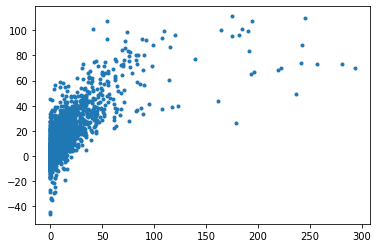

In [52]:
plt.scatter(Ytt,pred,marker = '.')

As we can see, the results from this model are higher to the rest of the previous models. This shows the power of the Multilayer Perceptron.

## Question No. 3 (Using Convolutional Neural Networks)

#### a. Use a convolutional neural network (in Keras or PyTorch) to solve this problem in much the same was as in part (ii) of Question (2). You are to develop an architecture of the neural network that takes an image directly as input and produces a count as the output corresponding to T3 cells. You are free to choose any network structure as long as you can show that it gives good performance. Report your results on the test examples by plotting the scatter plot between true and predicted counts on the test data. Also, report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score. You will be evaluated on the design of your machine learning model and final performance metrics. Try to get the best test performance you can. Please include convergence plots in your submission showing how does loss change over training epochs.

In [53]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50

In [54]:
#X = np.load("images.npy") #read images
#Y = pd.read_csv("counts.csv") #read cell counts
#F = np.loadtxt("split.txt") #read fold information

# As I am using Google Colab, I am uploading the files from Google Drive

X = np.load("/content/drive/MyDrive/data/images.npy") #read images
Y = pd.read_csv("/content/drive/MyDrive/data/counts.csv") #read cell counts
F = np.loadtxt("/content/drive/MyDrive/data/split.txt") #read fold information

In [55]:
Xtr = X[(F==1) | (F==2)]
Xtt = X[F==3] 

Ytr = np.array(Y[(F==1) | (F==2)])
Ytt = np.array(Y[F==3])

#We just get the counts that correspond to T3
Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

For this problem I have decided to use ResNet50, use the layers which are already trained and modify the outside layers to adapt the model to my problem. I have added several layers which require training at the end of the previous model.

In [56]:
base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3), 
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

In [57]:
x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We flatten our data and then create a fully connected layer
x = Flatten()(x)
x = Dense(64, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of counts in the image

In [58]:
model = Model(inputs=base_model.input, outputs=predictions)

In [59]:
# We will only train the layers that we have added to the network
k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

In [60]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [61]:
# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()])

In [62]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=10, 
        verbose=1, mode='auto',
        restore_best_weights=True)

In [63]:
history = model.fit(Xtr,Ytr,
                    validation_split = 0.1, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 1, 
                    callbacks = [monitor])

Epoch 1/50
48/48 [==============================] - 31s 556ms/step - loss: 1005.7076 - mean_squared_error: 1005.7076 - val_loss: 1297.8530 - val_mean_squared_error: 1297.8530
Epoch 2/50
48/48 [==============================] - 25s 525ms/step - loss: 771.4505 - mean_squared_error: 771.4505 - val_loss: 1415.9712 - val_mean_squared_error: 1415.9712
Epoch 3/50
48/48 [==============================] - 25s 528ms/step - loss: 630.8419 - mean_squared_error: 630.8419 - val_loss: 1216.2654 - val_mean_squared_error: 1216.2654
Epoch 4/50
48/48 [==============================] - 25s 528ms/step - loss: 495.0408 - mean_squared_error: 495.0408 - val_loss: 865.4898 - val_mean_squared_error: 865.4898
Epoch 5/50
48/48 [==============================] - 25s 524ms/step - loss: 405.7903 - mean_squared_error: 405.7903 - val_loss: 887.3932 - val_mean_squared_error: 887.3932
Epoch 6/50
48/48 [==============================] - 25s 527ms/step - loss: 334.5296 - mean_squared_error: 334.5296 - val_loss: 362.7292 -

In [64]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.grid()
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])


In [65]:
pred = model.predict(Xtt, verbose = 1)


51/51 [==============================] - 13s 238ms/step


In [66]:
import matplotlib.pyplot as plt
plt.scatter(Ytt, pred, marker = '.')

In [67]:
print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 14.32
Pearson correlation coefficient 0.877154544418408
Spearman correlation coefficient 0.7147639327935529
Coefficient of determination: 0.77


The improvement of using CNN compared to MLP is enormous. This shows us the powerful tool that CNN are, even using transfer learning.

Predicted T3 Cell Count: 0
True T3 Cell Count: 4


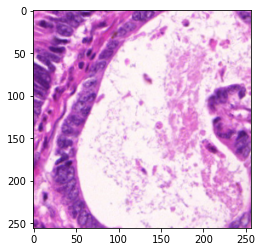

In [68]:
# Here we do what the exercise requires us to do. We input an image and it returns
# its predicted T3 cell count. Note that the prediction is rounded as the cell count
# has to be an integer.
rdm = np.random.randint(0,len(Xtt))
plt.imshow(Xtt[rdm])
prediction = round(model.predict(Xtt[rdm:rdm + 1])[0,0]) 

print("Predicted T3 Cell Count:", prediction)
print("True T3 Cell Count:", Ytt[rdm])

#### b. Use three fold cross validation with your optimal network architecture to predict the counts of T3 cells. Do 3-fold cross-validation with the given folds and report the results for each test fold in the form of separate predicted-vs-actual count scatter plots (3 folds so 3 plots in total) using your model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each fold separately.

In this exercise, to avoid data leakage, I define the model completely everytime I use it. It occupies more space in the script, but I make sure there is no contamination. If not, after the first iteration, I would be using the data I used before to train as validation data and this would make the model to artificially improve.

Root mean squared error: 16.06
Pearson correlation coefficient 0.8646642812236048
Spearman correlation coefficient 0.6980090007038883
Coefficient of determination: 0.70


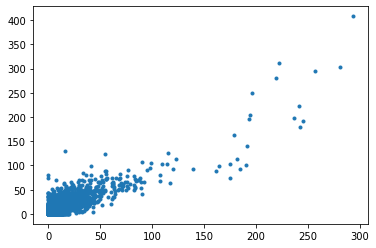

In [70]:
# Case 1:

Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(64, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.1, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 16.48
Pearson correlation coefficient 0.8769992744375803
Spearman correlation coefficient 0.7440726719097278
Coefficient of determination: 0.75


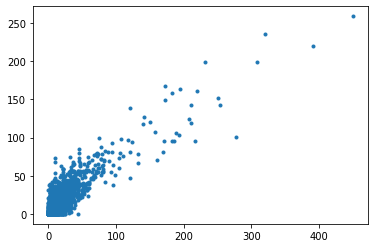

In [71]:
# Case 2:

Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(64, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.1, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [72]:
# Case 3:

Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3), 
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(64, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of cells in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.1, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 16.15
Pearson correlation coefficient 0.8368406435832956
Spearman correlation coefficient 0.7827778592475716
Coefficient of determination: 0.68


In [73]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

score_CNN = []
score_CNN.append({
        'model': 'Convolutional Neural Network',
        'RSME': average_mse, 
        'Pearson Coefficient': average_pearson,
        'Spearman Coefficient': average_spearman,
        'R2 Score': average_r2
    })

**I include here a table with the metrics of each of the models that I have tried**

In [93]:
df_1 = pd.DataFrame(score_OLS,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])
df_2 = pd.DataFrame(score_OLSRidge,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])
df_3 = pd.DataFrame(score_SVR1,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])
df_4 = pd.DataFrame(score_SVM2,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])
df_5 = pd.DataFrame(score_MLP,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])
df_6 = pd.DataFrame(score_CNN,columns=['model','RSME','Pearson Coefficient', 'Spearman Coefficient', 'R2 Score'])

dfs = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6])
dfs

model        RSME  \
0                      Ordinary Linear Squares Model  566.000449   
0  Ordinary Linear Squares Model with Regularization  500.146282   
0  Support Vector Machine w Linear Kernel and C =...  485.129788   
0   Support Vector Machine w RBF kernel and C = 1000  480.592319   
0                              Multilayer Perceptron  438.401724   
0                       Convolutional Neural Network   16.231183   

   Pearson Coefficient  Spearman Coefficient  R2 Score  
0             0.659420              0.630668  0.351745  
0             0.659128              0.736680  0.427169  
0             0.688225              0.771772  0.444368  
0             0.698726              0.766961  0.449565  
0             0.706144              0.754875  0.497887  
0             0.859501              0.741620  0.712886

#### c. Use a convolutional neural network (in Keras or Pytorch) to predict the counts of 6 types of cells simultaneously given the image patch as input and perform 3-fold cross-validation using the given folds. You are free to choose any network structure as long as you can show that it gives good cross-validation performance. Do 3-fold cross-validation using the specified folds and report the results for each test fold for each cell type in the form of separate predictedvs-actual count scatter plots (3 folds, 6 cell types so 18 plots in total) using your optimal machine learning model and report your results in terms of RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient and R2 score for each cell type and each fold separately along with the average of each cell type across the 3 folds.

My first attempt to this exercise was to use a layer with 6 nodes as the output layer. Let's see how the model behaves.

Test Fold: 3
Cell type: 1
Root mean squared error: 2.03
Pearson correlation coefficient 0.2357672805703938
Spearman correlation coefficient 0.1772371522009984
Coefficient of determination: -0.56


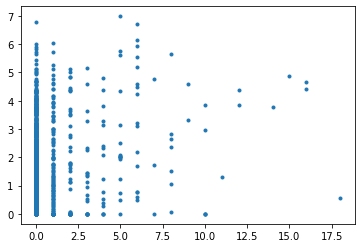

Cell type: 2
Root mean squared error: 24.08
Pearson correlation coefficient 0.7680043260240791
Spearman correlation coefficient 0.776607626926074
Coefficient of determination: 0.50


Cell type: 3
Root mean squared error: 16.18
Pearson correlation coefficient 0.8754735113687319
Spearman correlation coefficient 0.7199514589511231
Coefficient of determination: 0.70


Cell type: 4
Root mean squared error: 6.58
Pearson correlation coefficient 0.6560891697866432
Spearman correlation coefficient 0.6344008409082033
Coefficient of determination: 0.42


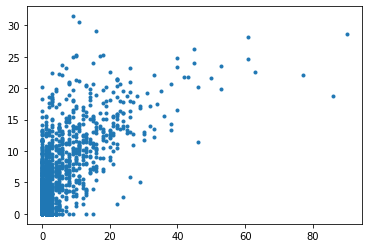

Cell type: 5
Root mean squared error: 1.51
Pearson correlation coefficient 0.3924801442436363
Spearman correlation coefficient 0.36064303236550616
Coefficient of determination: 0.09


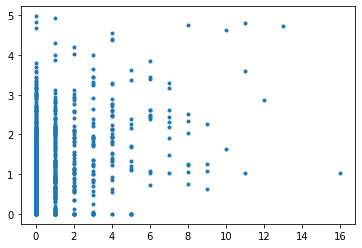

Cell type: 6
Root mean squared error: 13.08
Pearson correlation coefficient 0.7191137086042612
Spearman correlation coefficient 0.6752033374307259
Coefficient of determination: 0.48


In [97]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3), 
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x)  
predictions = Dense(6, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 100, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)


print('Test Fold: 3')
for i in range(6):
  fig = plt.figure()
  plt.scatter(Ytt[:,i], pred[:,i], marker = '.')
  print('Cell type:',i + 1)
  print("Root mean squared error: %.2f" % mean_squared_error(Ytt[:,i], pred[:,i], squared = False))
  print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt[:,i]),np.ravel(pred[:,i]))[0])
  print('Spearman correlation coefficient',st.spearmanr(Ytt[:,i], pred[:,i])[0])
  print("Coefficient of determination: %.2f" % r2_score(Ytt[:,i],pred[:,i]))
  plt.show()

Test Fold: 2
Cell type: 1
Root mean squared error: 3.25
Pearson correlation coefficient 0.18993334988850302
Spearman correlation coefficient 0.24876469092419184
Coefficient of determination: -0.05


Cell type: 2
Root mean squared error: 22.61
Pearson correlation coefficient 0.7576546601512906
Spearman correlation coefficient 0.7851613762247427
Coefficient of determination: 0.54


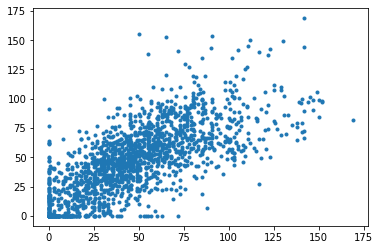

Cell type: 3
Root mean squared error: 17.01
Pearson correlation coefficient 0.8702117586177543
Spearman correlation coefficient 0.7947748595588836
Coefficient of determination: 0.73


Cell type: 4
Root mean squared error: 6.35
Pearson correlation coefficient 0.5705340764329896
Spearman correlation coefficient 0.5299561992170234
Coefficient of determination: 0.29


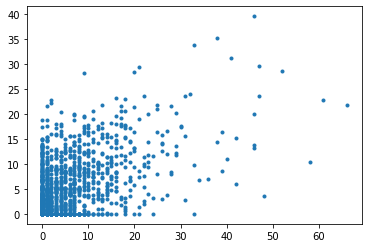

Cell type: 5
Root mean squared error: 1.55
Pearson correlation coefficient 0.4359278383174277
Spearman correlation coefficient 0.318393206677855
Coefficient of determination: 0.13


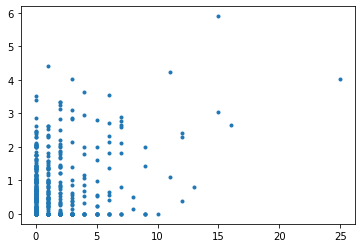

Cell type: 6
Root mean squared error: 11.60
Pearson correlation coefficient 0.7269282315715244
Spearman correlation coefficient 0.7220450370651919
Coefficient of determination: 0.49


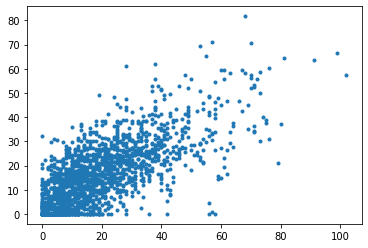

In [98]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3), 
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x)  
predictions = Dense(6, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 100, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)


print('Test Fold: 2')
for i in range(6):
  fig = plt.figure()
  plt.scatter(Ytt[:,i], pred[:,i], marker = '.')
  print('Cell type:',i + 1)
  print("Root mean squared error: %.2f" % mean_squared_error(Ytt[:,i], pred[:,i], squared = False))
  print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt[:,i]),np.ravel(pred[:,i]))[0])
  print('Spearman correlation coefficient',st.spearmanr(Ytt[:,i], pred[:,i])[0])
  print("Coefficient of determination: %.2f" % r2_score(Ytt[:,i],pred[:,i]))
  plt.show()

Test Fold: 1
Cell type: 1
Root mean squared error: 3.45
Pearson correlation coefficient 0.23658429087160435
Spearman correlation coefficient 0.17703183165890263
Coefficient of determination: 0.00


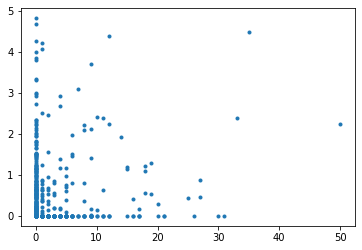

Cell type: 2
Root mean squared error: 22.73
Pearson correlation coefficient 0.7987487711968972
Spearman correlation coefficient 0.8081172025634666
Coefficient of determination: 0.63


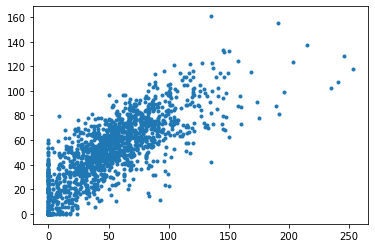

Cell type: 3
Root mean squared error: 17.13
Pearson correlation coefficient 0.8224651623884809
Spearman correlation coefficient 0.7491404840028955
Coefficient of determination: 0.64


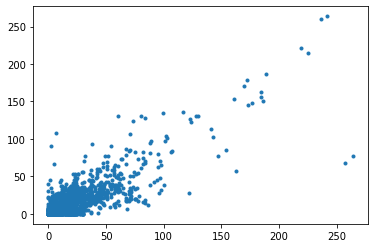

Cell type: 4
Root mean squared error: 7.11
Pearson correlation coefficient 0.6559771356365257
Spearman correlation coefficient 0.7679841810637892
Coefficient of determination: 0.25


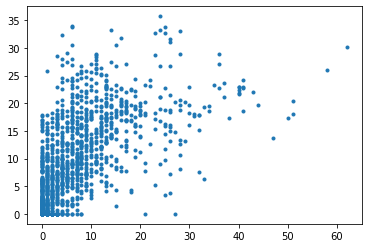

Cell type: 5
Root mean squared error: 1.55
Pearson correlation coefficient 0.4048540351116513
Spearman correlation coefficient 0.3576023495215525
Coefficient of determination: -0.36


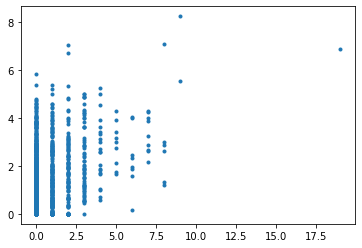

Cell type: 6
Root mean squared error: 11.77
Pearson correlation coefficient 0.7355000376816663
Spearman correlation coefficient 0.7247309049777066
Coefficient of determination: 0.53


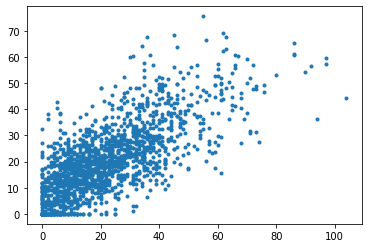

In [99]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3), 
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x)  
predictions = Dense(6, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=10, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 100, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)


print('Test Fold: 1')
for i in range(6):
  fig = plt.figure()
  plt.scatter(Ytt[:,i], pred[:,i], marker = '.')
  print('Cell type:',i + 1)
  print("Root mean squared error: %.2f" % mean_squared_error(Ytt[:,i], pred[:,i], squared = False))
  print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt[:,i]),np.ravel(pred[:,i]))[0])
  print('Spearman correlation coefficient',st.spearmanr(Ytt[:,i], pred[:,i])[0])
  print("Coefficient of determination: %.2f" % r2_score(Ytt[:,i],pred[:,i]))
  plt.show()

**Analysis of the results:** In this attempt, I tried to leave the network without much change but output 6 layers instead of one, each for each of the cell types. However, we can clearly see that it did not work. This is probably because of the difference in the numbering of each of the cells. Some of the types are more common than other, and this higher numbers are stopping our network to learn from the lower numbered types. As we saw in part 1iii), the distribution of the counts varies significantly among the cells. Perhaps T3 (lymphocytes) and T6 (epithelial) cells are the ones with a less skewed distribution. Our model adapts really well to these. However, for some cells, the cell counts tend to accumulate a lot in 0. This causes a big problem when performing regression. 

The option I decided to go for is to execute the model manualy for each cell type and each fold combination. The outputs are in general not great. This is because the counts in some of the cell types are highly imbalanced and this is a big problem for the network. This brings me to the conclusion that the best option is to design different models for each of the cell types, adjusting to the distribution of the counts and their size.

In the cases where there is a huge number of 0 counted cells, I would try to transform the problem into two. I would first implement a classifier model with two classes. The first one would classify as zero and the second one as non zero. After this, I would use regression on the images with counts greater than zero, to have better prediction results.

#### **Type 1 Cell**

Root mean squared error: 1.57
Pearson correlation coefficient 0.32254330904502326
Spearman correlation coefficient 0.2922422829941653
Coefficient of determination: 0.06


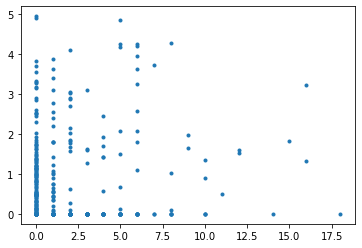

In [ ]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,0]
Ytt = Ytt[:,0]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 3.40
Pearson correlation coefficient 0.28875663258370377
Spearman correlation coefficient 0.2237561680524619
Coefficient of determination: 0.03


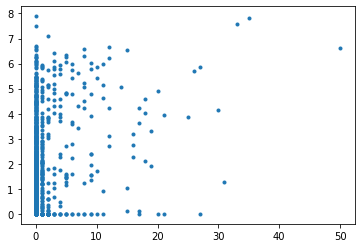

In [ ]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,0]
Ytt = Ytt[:,0]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 3.26
Pearson correlation coefficient 0.13665566173926338
Spearman correlation coefficient 0.22307627137011757
Coefficient of determination: -0.06


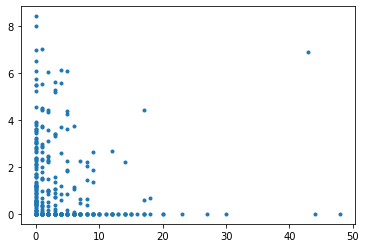

In [ ]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,0]
Ytt = Ytt[:,0]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [ ]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 2.74
Average Pearson correlation coefficient 0.2493185344559968
Average Spearman correlation coefficient 0.24635824080558158
Average Coefficient of determination: 0.01


The results are extremely poor as the data is extremely imbalanced and the network is uncapable of adapting to that imbalance.

#### **Type 2 Cell**

Root mean squared error: 27.57
Pearson correlation coefficient 0.7342405338981459
Spearman correlation coefficient 0.7422106846942031
Coefficient of determination: 0.35


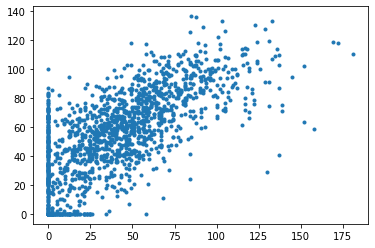

In [ ]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,1]
Ytt = Ytt[:,1]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

sca1 = plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 24.93
Pearson correlation coefficient 0.7504183176533147
Spearman correlation coefficient 0.7897863802223556
Coefficient of determination: 0.56


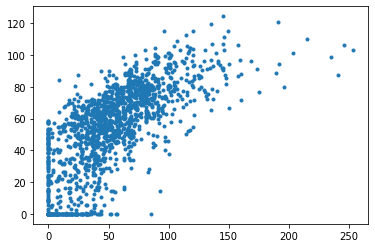

In [ ]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,1]
Ytt = Ytt[:,1]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 23.27
Pearson correlation coefficient 0.7441037435069464
Spearman correlation coefficient 0.7821658538737585
Coefficient of determination: 0.51


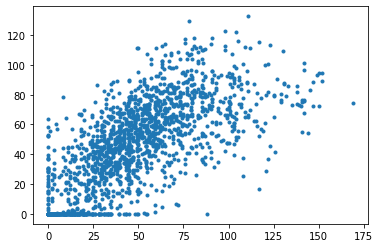

In [ ]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,1]
Ytt = Ytt[:,1]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [ ]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 25.26
Average Pearson correlation coefficient 0.7429208650194689
Average Spearman correlation coefficient 0.7713876395967724
Average Coefficient of determination: 0.47


#### **Type 3 Cell**

Root mean squared error: 14.55
Pearson correlation coefficient 0.8788191046428606
Spearman correlation coefficient 0.7293297187416784
Coefficient of determination: 0.76


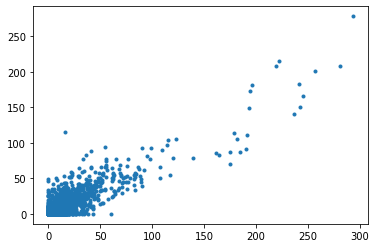

In [116]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

sca1 = plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 17.57
Pearson correlation coefficient 0.8217690386772831
Spearman correlation coefficient 0.7370977141915842
Coefficient of determination: 0.63


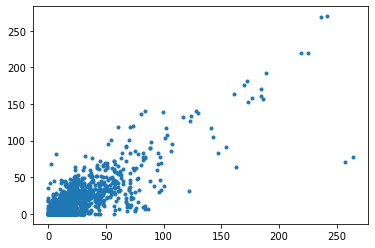

In [117]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 14.04
Pearson correlation coefficient 0.8891622270999467
Spearman correlation coefficient 0.7687638299522205
Coefficient of determination: 0.77


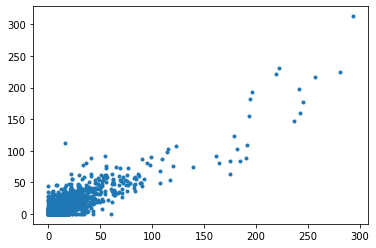

In [118]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,2]
Ytt = Ytt[:,2]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [119]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 15.39
Average Pearson correlation coefficient 0.8632501234733635
Average Spearman correlation coefficient 0.745063754295161
Average Coefficient of determination: 0.72


#### **Type 4 Cell**

Root mean squared error: 7.50
Pearson correlation coefficient 0.5762131730131872
Spearman correlation coefficient 0.5783601989682995
Coefficient of determination: 0.24


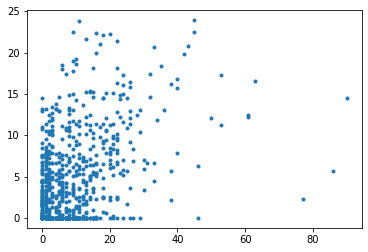

In [104]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,3]
Ytt = Ytt[:,3]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

sca1 = plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 6.64
Pearson correlation coefficient 0.6197534463120127
Spearman correlation coefficient 0.743910063663837
Coefficient of determination: 0.35


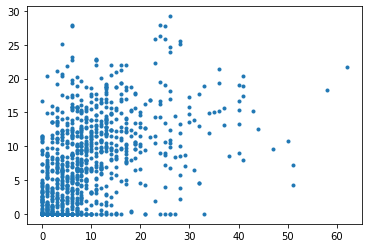

In [105]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,3]
Ytt = Ytt[:,3]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 6.37
Pearson correlation coefficient 0.5884878728549235
Spearman correlation coefficient 0.6620562980630423
Coefficient of determination: 0.28


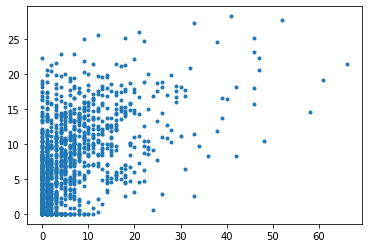

In [106]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,3]
Ytt = Ytt[:,3]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [107]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 6.84
Average Pearson correlation coefficient 0.5948181640600412
Average Spearman correlation coefficient 0.661442186898393
Average Coefficient of determination: 0.29


#### **Type 5 Cell**

Root mean squared error: 1.48
Pearson correlation coefficient 0.42924800524535733
Spearman correlation coefficient 0.40714786298119876
Coefficient of determination: 0.13


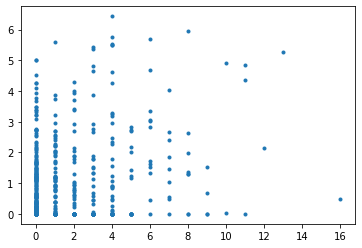

In [108]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,4]
Ytt = Ytt[:,4]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

sca1 = plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 1.31
Pearson correlation coefficient 0.3819958407401117
Spearman correlation coefficient 0.3365186730259719
Coefficient of determination: 0.03


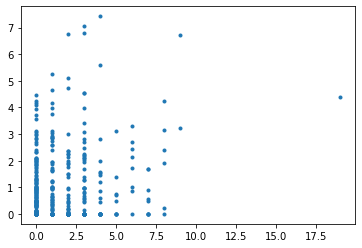

In [109]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,4]
Ytt = Ytt[:,4]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 1.59
Pearson correlation coefficient 0.36309847513154825
Spearman correlation coefficient 0.297301856324576
Coefficient of determination: 0.08


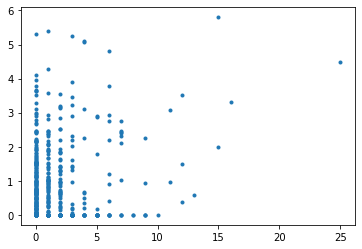

In [110]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,4]
Ytt = Ytt[:,4]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [111]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 1.46
Average Pearson correlation coefficient 0.3914474403723391
Average Spearman correlation coefficient 0.3469894641105822
Average Coefficient of determination: 0.08


#### **Type 6 Cell**

Root mean squared error: 12.22
Pearson correlation coefficient 0.7549419020994559
Spearman correlation coefficient 0.7280827440839713
Coefficient of determination: 0.54


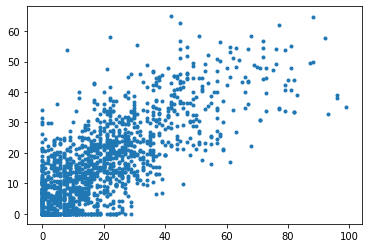

In [112]:
Xtr = X[(F==1)|(F==2)]
Xtt = X[F==3]

Ytr = np.array(Y[(F==1)|(F==2)])
Ytt = np.array(Y[F==3])

Ytr = Ytr[:,5]
Ytt = Ytt[:,5]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

sca1 = plt.scatter(Ytt, pred, marker = '.')

rsme1 = mean_squared_error(Ytt, pred, squared = False)
pearcorr1 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr1 = st.spearmanr(Ytt, pred)[0]
r2_1 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 11.57
Pearson correlation coefficient 0.7422908300865901
Spearman correlation coefficient 0.7290515692533391
Coefficient of determination: 0.54


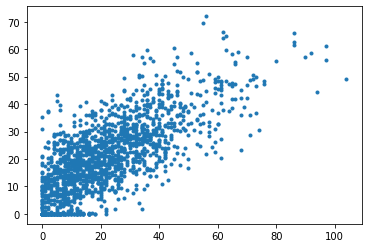

In [113]:
Xtr = X[(F==2)|(F==3)]
Xtt = X[F==1]

Ytr = np.array(Y[(F==2)|(F==3)])
Ytt = np.array(Y[F==1])

Ytr = Ytr[:,5]
Ytt = Ytt[:,5]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme2 = mean_squared_error(Ytt, pred, squared = False)
pearcorr2 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr2 = st.spearmanr(Ytt, pred)[0]
r2_2 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

Root mean squared error: 11.90
Pearson correlation coefficient 0.7201074810101101
Spearman correlation coefficient 0.7203744221610938
Coefficient of determination: 0.46


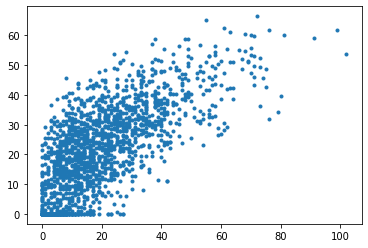

In [114]:
Xtr = X[(F==1)|(F==3)]
Xtt = X[F==2]

Ytr = np.array(Y[(F==1)|(F==3)])
Ytt = np.array(Y[F==2])

Ytr = Ytr[:,5]
Ytt = Ytt[:,5]

base_model = ResNet50(
    weights='imagenet',  # Load the pretrained weights, trained on the ImageNet dataset.
    include_top=False,  # We don't include the fully-connected layer at the top of the network - we need to modify the top.
    input_shape=(256, 256, 3),  # 224x224 was the original size ResNet was trained on, so I decided to use this.
    pooling='avg',  # A global average pooling layer will be added after the last convolutional block.
)

x = base_model.output  # Since we used pooling='avg', the output is of the pooling layer
# We add a single fully-connected layer
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = BatchNormalization()(x) 
predictions = Dense(1, activation='relu')(x)  # This is the new output layer - notice only 1 output, this will correspond to the number of people in the image

model = Model(inputs=base_model.input, outputs=predictions)

k = -4
for layer in model.layers[:k]:
    layer.trainable = False
for layer in model.layers[k:]:
    layer.trainable = True

# Compile the model
model.compile(loss = tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(), 
    metrics = [tf.keras.metrics.MeanSquaredError()]) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=5, 
        verbose=0, mode='auto',
        restore_best_weights=True)  

history = model.fit(Xtr,Ytr,
                    validation_split = 0.2, 
                    batch_size = 64, 
                    epochs = 50, 
                    verbose = 0, 
                    callbacks = [monitor])

pred = model.predict(Xtt, verbose = 0)

plt.scatter(Ytt, pred, marker = '.')

rsme3 = mean_squared_error(Ytt, pred, squared = False)
pearcorr3 = st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0]
spearcorr3 = st.spearmanr(Ytt, pred)[0]
r2_3 = r2_score(Ytt,pred)

print("Root mean squared error: %.2f" % mean_squared_error(Ytt, pred, squared = False))
print('Pearson correlation coefficient',st.pearsonr(np.ravel(Ytt),np.ravel(pred))[0])
print('Spearman correlation coefficient',st.spearmanr(Ytt, pred)[0])
print("Coefficient of determination: %.2f" % r2_score(Ytt,pred))

In [115]:
average_mse = (rsme1 + rsme2 + rsme3) / 3
average_pearson = (pearcorr1 + pearcorr2 + pearcorr3) / 3
average_spearman = (spearcorr1 + spearcorr2 + spearcorr3) / 3
average_r2 = (r2_1 + r2_2 + r2_3) / 3

print("Average Root mean squared error: %.2f" % average_mse)
print('Average Pearson correlation coefficient',  average_pearson)
print('Average Spearman correlation coefficient',  average_spearman)
print("Average Coefficient of determination: %.2f" % average_r2)

Average Root mean squared error: 11.90
Average Pearson correlation coefficient 0.7391134043987186
Average Spearman correlation coefficient 0.7258362451661348
Average Coefficient of determination: 0.52
